# 1. Lectura y escritura de datos

En este notebook se mostrará el código para leer y escribir datos de diversas fuentes. Pandas puede leer una variedad de tipos de archivos con la función "read".

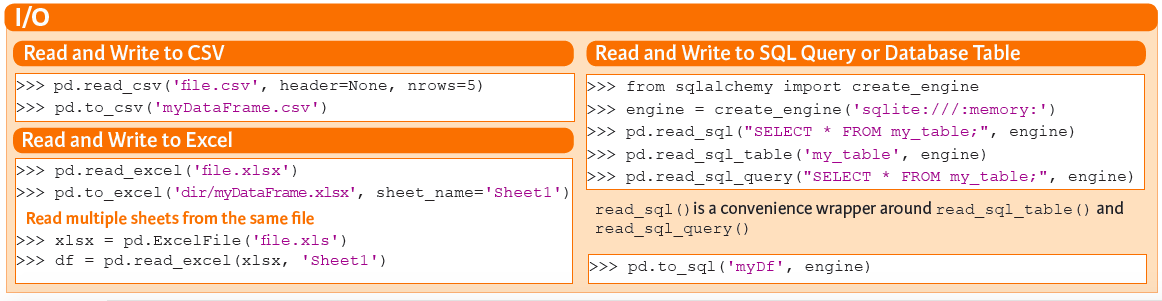

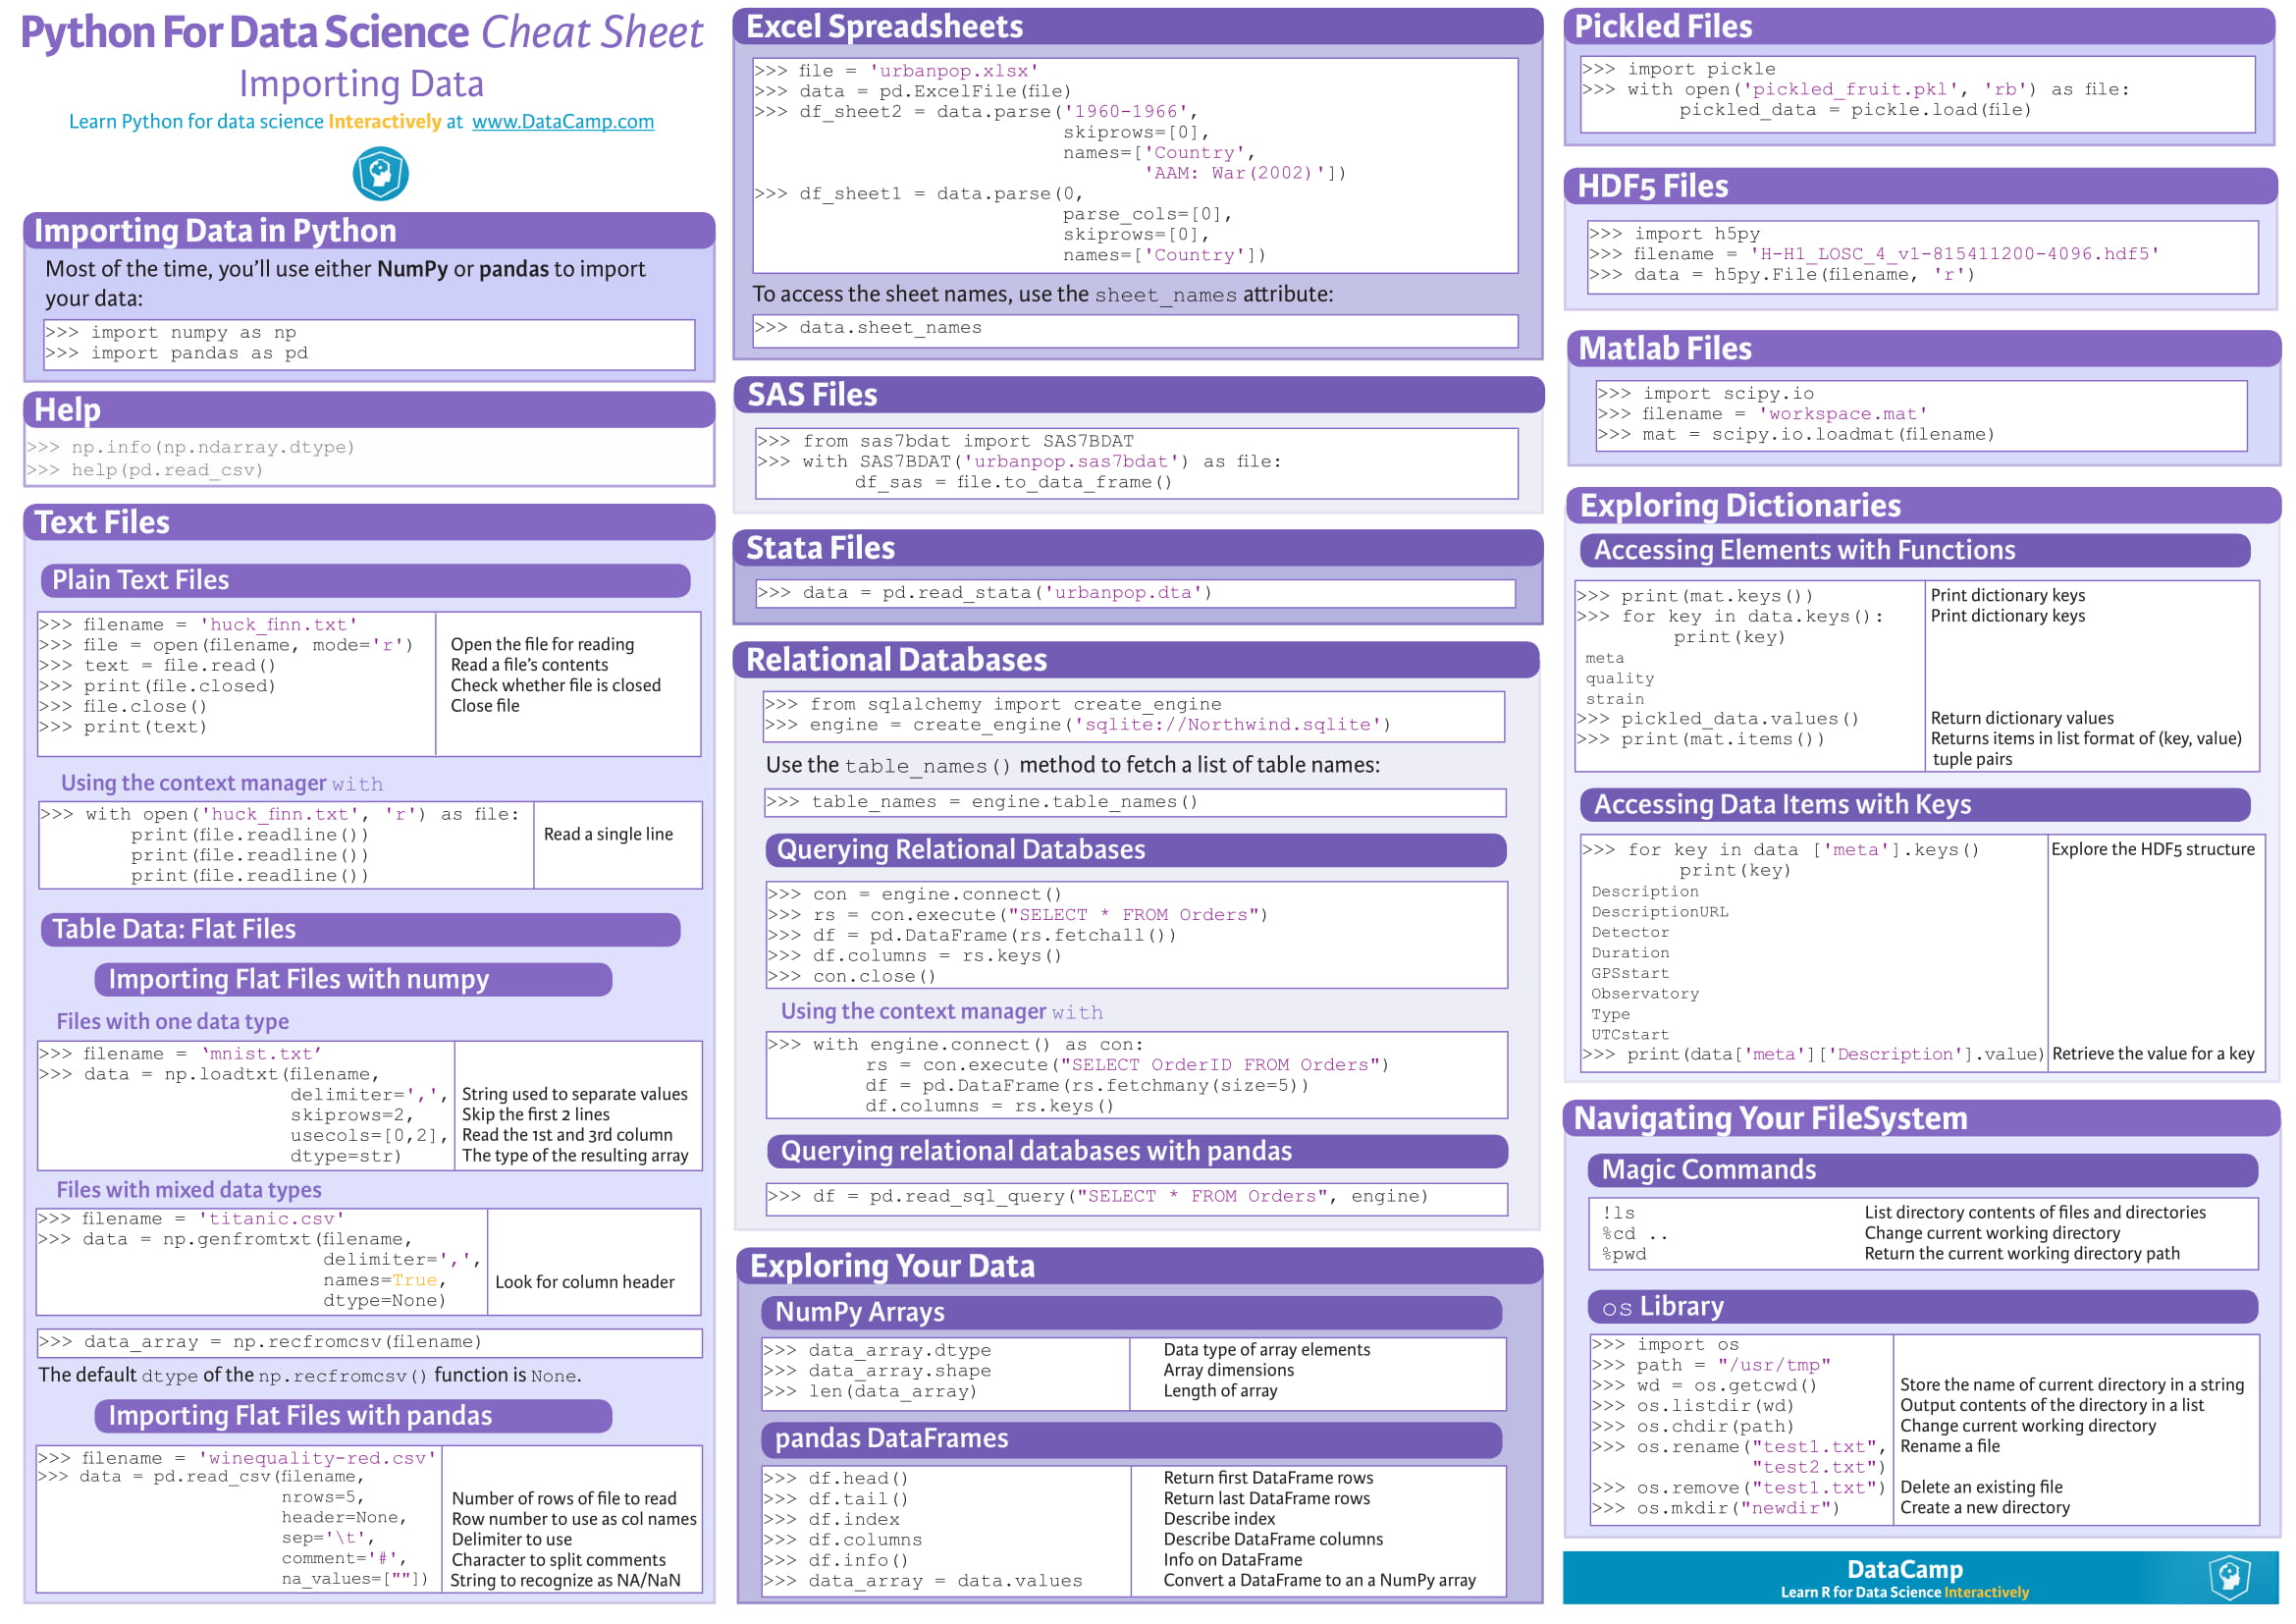

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path_data = ''

### CSV

#### Leer

In [ ]:
df = pd.read_csv('../Data/oscar_age_female.csv',sep=',')

In [ ]:
df.head()

In [ ]:
df.tail()

#### Escribir

In [ ]:
df.to_csv('../Data/oscar_age_female_nuevo.csv',index=False,sep='|')

### EXCEL

Pandas pueden leer y escribir archivos de Excel, ten en cuenta que esto solo importa datos. No las fórmulas ni las imágenes, tener imágenes o macros pueden hacer que la función read_excel no funcione.

#### Leer

In [ ]:
df = pd.read_excel('../Data/Excel_Sample.xlsx',sheet_name='Sheet1')

In [ ]:
df

#### Escribir

In [ ]:
df.to_excel('../Data/Excel_Sample_nuevo.xlsx',sheet_name='Sheet1')

### JSON

#### Leer

In [ ]:
pd.read_json('../Data/test.json')

### HTML

Se requiere instalar htmllib5,lxml, y BeautifulSoup4:



1.  pip install lxml
2.  pip install html5lib
3.  pip install BeautifulSoup4

***
Luego restaurar el kernel

#### Leer

In [ ]:
df = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [ ]:
#df = pd.read_html('https://www.fdic.gov/buying/historical/loans/index.html')

In [ ]:
df[0]

### Obtener información de la Web

In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
# Set headers
headers = requests.utils.default_headers()
headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

### URL a scrapear

In [ ]:
url = 'https://hiraoka.com.pe/tecnologia/computadoras/notebooks-y-2-en-1?p=1'

### Obtener página

In [ ]:
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html.parser')

In [ ]:
#soup

### Lista de productos

In [ ]:
productos = soup.find_all(class_="product name product-item-name")

In [ ]:
#productos

In [ ]:
productos_lista = []
for producto in productos:
    productos_lista.append(producto.get_text().strip())
    print(producto.get_text().strip())

### Lista de marcas

In [ ]:
marcas = soup.find_all(class_="product brand product-item-brand")

In [ ]:
marcas_lista = []
for marca in marcas:
    marcas_lista.append(marca.get_text().strip())

### Lista de precios

In [ ]:
precios = soup.find_all('span', attrs={'data-price-type': 'finalPrice'})

In [ ]:
precios_lista = []
for precio in precios:
    precios_lista.append(precio.get('data-price-amount').strip())

### Crear DataFrame

In [ ]:
datos = pd.DataFrame({'Marca':marcas_lista , 'Producto':productos_lista, 'Precio':precios_lista }) 
datos